# Data Ingestion

In [1]:
# import libraries
import pandas as pd
import numpy as np

# load dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True).frame
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Feature Engineering

In [2]:
# Finding number of rows and columns

data.shape

(20640, 9)

In [3]:
# To get following information : 
# 1.number of rows
# 2.number of columns
# 3.range index
# 4.column labels
# 5.number of cells in each column (non-null values)
# 6.column data types
# 7. memory usage

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
data.isnull().sum()
# No missing values present in the data

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [5]:
## check for duplicated records
data.duplicated().sum()

0

In [6]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
# 1.Divide  the dataset into independent and dependent
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# Feature Selection

<AxesSubplot:>

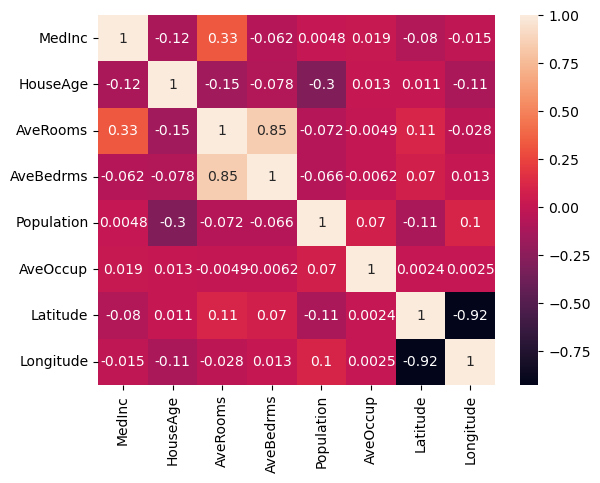

In [8]:
## correlation
import seaborn as sns
sns.heatmap(X.corr(),annot=True)

In [9]:
# Remove column name columns having correlation > 0.7, and keep any one
X = X.drop(['AveRooms'], axis=1)
X.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=36)

X_train.shape,X_test.shape

((13828, 7), (6812, 7))

# Feature Selection

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#To make mean =0 and sd =1 using z score formula

In [12]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 2.94615603,  1.69257444, -0.34582825, ...,  0.00631568,
        -0.67676958,  0.7291751 ],
       [-0.53712836,  0.26178584, -0.1286748 , ...,  0.10882511,
        -0.78878315,  0.59982719],
       [ 0.02597188,  0.50025061, -0.31765344, ..., -0.11288116,
         0.79807576, -1.19114398],
       ...,
       [-0.46390242,  0.57973886, -0.17137333, ...,  0.24671234,
        -0.77478146,  0.69932558],
       [ 0.03045085, -0.85104973,  0.22657547, ..., -0.04515438,
         1.27880067, -1.66873629],
       [ 0.48355594, -0.69207322, -0.15146294, ..., -0.12518059,
         0.95676166, -1.25084302]])

In [13]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.07003245, -1.88439705, -0.16002579, ..., -0.10560014,
        -0.74677806,  0.93812174],
       [-1.04892878,  1.0566684 , -0.08253962, ..., -0.01249385,
         1.40014871, -0.91752338],
       [ 0.15617449, -0.13565543, -0.04492227, ..., -0.17835535,
        -0.74211083,  0.55007799],
       ...,
       [ 3.81372206,  0.26178584, -0.13038864, ..., -0.0768889 ,
        -0.71877467,  0.55007799],
       [ 2.52179968,  0.26178584,  0.06441209, ..., -0.03343845,
        -0.69077128,  0.54510307],
       [-0.37291683,  0.50025061, -0.19454177, ...,  0.18848079,
        -0.74677806,  0.8037989 ]])

# Model Selection

### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()
regression.fit(X_train,y_train)
## prediction
lir_y_pred=regression.predict(X_test)

### Ridge Regression

In [15]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(X_train,y_train)
rr_y_pred=ridge.predict(X_test)

### Lasso Regression

In [16]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=20.0)
lasso.fit(X_train,y_train)
lar_y_pred=lasso.predict(X_test)

### ElasticNet Regression

In [17]:
from sklearn.linear_model import ElasticNet

elasticnet=ElasticNet(alpha=20.0)
elasticnet.fit(X_train,y_train)
er_y_pred=elasticnet.predict(X_test)

# Model Evaluation

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import numpy as np

### Linear Regression

In [19]:
mse=mean_squared_error(y_test,lir_y_pred)
print("RMSE:",np.sqrt(mse))

r2score=r2_score(y_test,lir_y_pred)
adjr2score=1 - (1-r2score)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("adjusted r2 score:",adjr2score)

RMSE: 0.7370996146819041
adjusted r2 score: 0.5798103738041305


### Ridge Regression

In [20]:
mse=mean_squared_error(y_test,rr_y_pred)
print("RMSE:",np.sqrt(mse))

r2score=r2_score(y_test,lir_y_pred)
adjr2score=1 - (1-r2score)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("adjusted r2 score:",adjr2score)

RMSE: 0.7370988858118008
adjusted r2 score: 0.5798103738041305


### Lasso Regression

In [21]:
mse=mean_squared_error(y_test,lar_y_pred)
print("RMSE:",np.sqrt(mse))

r2score=r2_score(y_test,lar_y_pred)
adjr2score=1 - (1-r2score)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("adjusted r2 score:",adjr2score)

RMSE: 1.1373263679454568
adjusted r2 score: -0.00037579226486395


### ElasticNet Regression

In [22]:
mse=mean_squared_error(y_test,er_y_pred)
print("RMSE:",np.sqrt(mse))

r2score=r2_score(y_test,er_y_pred)
adjr2score=1 - (1-r2score)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("adjusted r2 score:",adjr2score)

RMSE: 1.1373263679454568
adjusted r2 score: -0.00037579226486395
